## Problema 1:

O nióbio (Nb) possui um raio atômico (RA) de 0.1430 nm, uma densidade de 8.57g/cm³ e uma MA de 92.91g/mol. Determine se ele possui estrutura cúbica de face centrada (CFC) ou cúbica de corpo centrado (CCC).

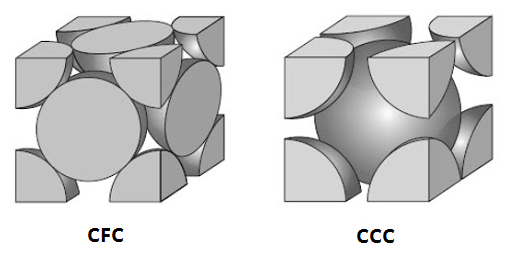

Passo a passo:

##### 1
- Implemente a função que correlaciona o volume da célula unitária (figura acima) e as variáveis dadas no exercício:
        - A função deverá receber como parâmetro as variáveis do lado direito e retornar o volume da célula.
***        
$$ V = \frac {n M}{\rho N} $$

- V = Volume
- n = nº átomos por célula unitária
- M = Massa Atômica
- $\rho$ = densidade
- N = nº de Avogadro = 6.02214 $\cdot$ 10 <sup> 23 </sup>


*Uma nota sobre n: uma esfera completa (como aquela no centro da célula CCC) é um átomo, frações de esfera são frações de um átomo; o nº de átomos numa célula é dado pela soma das esferas inteiras e frações contidas numa célula.*

##### 2

- A partir do volume de cada célula, descubra o tamanho de aresta do cubo. 
- Implemente uma função que retorna a hipotenusa de um triângulo retângulo, recenbendo os dois catetos como parâmetros.
- Determine o raio do átomo, em cada célula. Compare com o valor do enunciado.

*Perceba que no CFC, a diagonal da **FACE** é igual a 4 raios. No CCC, a diagonal do **CUBO** é igual a 4 raios. Use essas relações e a função pedida para determinar os raios.*

In [13]:
ra = 0.1430
d = 8.57
ma = 92.91
N = 6.02e23

n_cfc = 8 * 1/8 + 4 * 1/2
n_ccc = 1 + 8 * 1/8

def volume (n, ma, d, N):

    return n * ma / d / N

def pitagoras (cateto1, cateto2):
    
    hipotenusa = (cateto1 ** 2 + cateto2 ** 2) ** 0.5
    return hipotenusa

In [14]:
vol_cel_cfc = volume (n_cfc, ma, d, N) #cm³
vol_cel_ccc = volume (n_ccc, ma, d, N) #cm³

aresta_cfc = vol_cel_cfc ** (1/3)
aresta_ccc = vol_cel_ccc ** (1/3)

raio_cfc = pitagoras(aresta_cfc, aresta_cfc)/ 4 #cm
raio_cfc = raio_cfc * 1e7 #nm

# lembre-se que a diagonal do cubo (hipotenusa) é dada pela diagonal de uma face (cateto 1) e a aresta (cateto 2).
# E a diagonal do cubo é a hipotenusa de duas arestas como catetos.
# Logo, você pode usar a função duas vezes, uma dentro da outra, pra encontrar o raio do átomo na CCC.

raio_ccc = pitagoras(pitagoras(aresta_ccc, aresta_ccc), aresta_ccc)/ 4 #cm
raio_ccc = raio_ccc * 1e7 #nm

raio_cfc, raio_ccc #ccc é a estrutura do Nb.

(0.13365661985176713, 0.14300098103598158)

## Problema 2:

O conceito mais importante na teoria da extração por solventes é que uma determinada espécie, em certas condições, estará distribuida em duas fases, quando o sistema alcançar o equilíbrio. 

Essa relação, comumente chamada de Coeficiente de Distribuição ou Coeficiente de Partição (D), para a espécie A, distribuída nas fases 1 e 2, pode ser expressa na seguinte forma:

$ D = {[A]_{1} \over [A]_{2}} $ ou $ D = {[A]_{org.} \over [A]_{aq.}} $, já que é bem comum que uma fase seja aquosa e a outra orgânica. 

Quando estamos interessados em separar dois elementos, nós comparamos os $D$ deles em várias condições, e buscamos aquela onde os valores sejam bem diferentes um do outro, porque isso indica uma condição onde um estará tendendo para uma fase e o outro elemento para a outra fase, tornando-os mais separáveis. Isso pode ser expresso pelo Fator de Separação ($\beta$).

O fator de separação dos elementos A e B podem ser expressos da seguinte forma:

$$ \beta_{A/B} = {D_{A} \over D_{B}} = {[A]_{org.} \cdot [B]_{aq.} \over [A]_{aq.} \cdot [B]_{org.}} $$

Li et al (1987) criou um modelo empírico que correlaciona $D_{ETR}$ em função de três variáveis, na condição de equilíbrio:

$[Extratante]$, &emsp; $[H^{+}]$ &emsp; e &emsp;$[ETR^{3+}]$, todas em mol/L.

$$ D = C_1 \cdot [Extratante]^{C_2} \cdot [H^{+}]^{C_3} \cdot [ETR^{3+}]^{C_4} $$

Onde $C_1, C_2, C_3$ e $C_4$ são constantes determinadas experimentalmente.

Embora o modelo não seja perfeito, ele pode ser útil para realizarmos especulações e nos dá uma ideia de por onde devemos começar nossas investigações.

Para uma certa faixa destes parâmetros, num meio de ácido clorídrico e usando P507 como extratante, temos os seguintes valores experimentais, para Disprósio (Dy) e Hólmio (Ho):

- Dy:
    - $C_1$ = 0.6760
    - $C_2$ = 1.9847
    - $C_3$ = -3.161
    - $C_4$ = -0.19
- Ho:
    - $C_1$ = 0.1616
    - $C_2$ = 0.6236
    - $C_3$ = -2.140
    - $C_4$ = -0.478
    
*Agora vamos mexer nas variáveis das equações e procura uma condição onde o $\beta_{Ho/Dy}$ seja alto.*

In [4]:
c1_dy = 0.6760
c2_dy = 1.9847
c3_dy = -3.161
c4_dy = -0.19

c1_ho = 0.1616
c2_ho = 0.6236
c3_ho = -2.140
c4_ho = -0.478

concentracao_dy = 0.1 #mol/L
concentracao_ho = 0.1 #mol/L

h_min = 0.3 #mol/L
h_max = 1 #mol/L

ext_min = 0.1 #mol/L
ext_max = 1 #mol/L

Crie uma função que receba os parâmetros do modelo empírico acima. Tente implementá-la usando a sintaxe ***lambda***.

*Lidando com programação, é muito importante nós sabermos trabalhar com dispositivos que nós não fazemos a menor ideia de como eles funcionam, as chamadas **Caixas Pretas**. Para que a gente não tenha problema de visualizar o gráfico abaixo, é importante que você implemente a função **exatamente** como ela foi pedida. A função que faz o gráfico é uma caixa preta e você não precisa se preocupar com ela agora.*

- Requisitos da função:
    - Nome: $d$
    - Parâmetros:
        1. Concentração de extratante;
        2. Concentração de $H^{+}$;
        3. Concentração de $ETR^{3+}$;
        4. As constantes $C_1, C_2, C_3$ e $C_4$, exatamente nessa ordem.
        
    A função será chamada dessa forma:  
    $d(ext, h, etr, c1, c2, c3, c4)$

In [5]:
d = lambda ext, h, etr, c1, c2, c3, c4: c1 * ext**c2 * h**c3 * etr**c4

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D

def funcao_secreta(ext_min, ext_max, h_min, h_max, 
                   concentracao_etr_ho, c1_ho, c2_ho, c3_ho, c4_ho,
                   concentracao_etr_dy, c1_dy, c2_dy, c3_dy, c4_dy):
    
    lista_ext = np.linspace(ext_min, ext_max, 100)
    lista_h = np.linspace(h_min, h_max, 100)    
    lista_ext, lista_h = np.meshgrid(lista_ext, lista_h)

    d_ho = d(lista_ext, lista_h, concentracao_etr_ho, c1_ho, c2_ho, c3_ho, c4_ho)
    d_dy = d(lista_ext, lista_h, concentracao_etr_dy, c1_dy, c2_dy, c3_dy, c4_dy)
    beta = d_ho/d_dy

    fig = plt.figure(figsize=(20,6))
    
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    p1 = ax1.plot_surface(lista_h, lista_ext, d_ho, cmap=mpl.cm.jet, rstride=1, cstride=1, linewidth=0)    
    ax1.set_xlabel('[H+]')
    ax1.set_ylabel('Extratante')
    ax1.set_zlabel('D Hólmio')
    cb1 = fig.colorbar(p1, shrink=0.5)    
    
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    p2 = ax2.plot_surface(lista_h, lista_ext, d_dy, cmap=mpl.cm.jet, rstride=1, cstride=1, linewidth=0)    
    ax2.set_xlabel('[H+]')
    ax2.set_ylabel('Extratante')
    ax2.set_zlabel('D Disprósio')
    cb2 = fig.colorbar(p2, shrink=0.5)
           
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    p3 = ax3.plot_surface(lista_h, lista_ext, beta, cmap=mpl.cm.jet, rstride=1, cstride=1, linewidth=0)    
    ax3.set_xlabel('[H+]')
    ax3.set_ylabel('Extratante')
    ax3.set_zlabel('Fator de Separação')
    cb3 = fig.colorbar(p3, shrink=0.5)
    
    return ax1, ax2, ax3

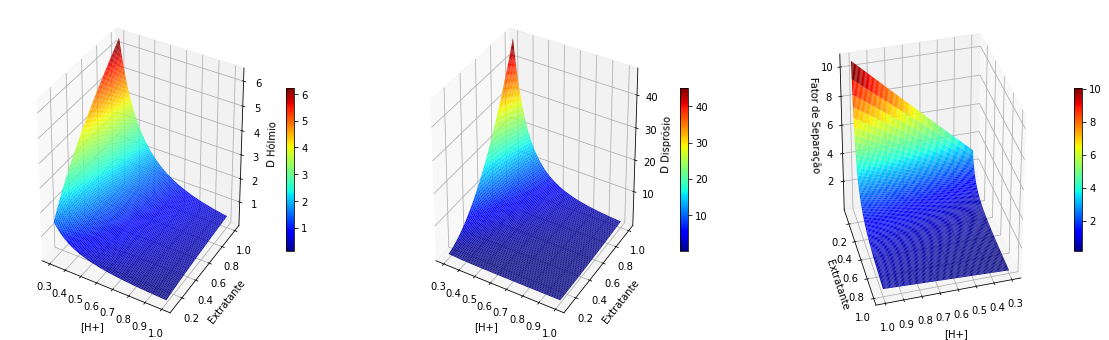

In [19]:
grafico1, grafico2, grafico3 = funcao_secreta(ext_min, ext_max, h_min, h_max,
                                              concentracao_ho, c1_ho, c2_ho, c3_ho, c4_ho,
                                              concentracao_dy, c1_dy, c2_dy, c3_dy, c4_dy)
grafico1.view_init(30,300)
grafico2.view_init(30,300)
grafico3.view_init(30,75)

# Você pode girar os gráficos mexendo nos parâmetros acima. 
# O parâmetro da esquerda muda a altura e o da direita gira o plano xy.

    #gráfico 1                                      gráfico 2                                      gráfico 3

Experimente mexer nos parâmetros e nas constantes dadas, pra ver o que acontece.  
Abaixo segue uma lista com as constantes para outros ETRs. 😉   
*Retirado de Jack Zhang e Baodong Zhao, Separation Hydrometallurgy of Rare Earth Elements. 2016.*
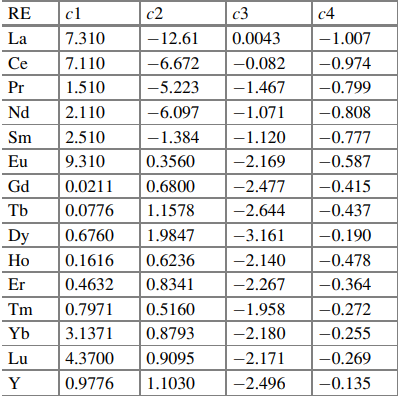

## Problema 3:

As equações das espécies de um ácido indicam quais as formas que um ácido de Brønsted-Lowry assume num determinado pH e qual o percentual da espécie, em relação ao todo. A curva de especiação é uma maneira gráfica de observar esse comportamento ao longo da escala de pH. O entendimento desse comportamento de equilíbrio é importante para algumas aplicações, como por exemplo:

- A precipitação seletiva de sais de sulfeto na análise qualitativa depende de uma manipulação precisa do pH para controlar a quantidade sulfeto no meio.
- A precipitação de proteínas depende do conhecimento do seu ponto isoelétrico, que é onde ocorre o balanceamento das cargas dos aminoácidos, que são espécies ácido-base de Brønsted-Lowry.
- A água de lavagem de um efluente gasoso de amônia, na produção de ureia, pode ser acidificada para aumentar a captura da amônia e diminuir a quantidade emitida.
- O pH de um processo de extração por solventes envolve o conhecimento do comportamento ácido-base do extratante, para minimizar perdas no processo devido a sua solubilização na fase aquosa e prevenir a formação de uma emulsão, que torna o processo imprevisível e difícil de fazer análises químicas.

Uma das curvas mais famosas, é a curva do ácido poliprótico EDTA *(ácido etilenodiaminotetracético)*, um complexo muito estudado nas titulações de compleximetria e que não raramente aparece em processos de separação de cátions metálicos, em processos de troca iônica. O EDTA possui quatro hidrogênios ionizáveis em meio aquoso.

Essas são as equações genéricas para o percentual das espécies de um ácido poliprótico:

$$ \alpha_{H_4 Y} = {[H^{+}]^4 \over 
{[H^{+}]^4 +[H^{+}]^3 K_1 + [H^{+}]^2 K_1 K_2 + [H^{+}] K_1 K_2 K_3 + K_1 K_2 K_3 K_4}}$$

$$ \alpha_{H_3 Y^-} = {[H^{+}]^3 K_1 \over 
{[H^{+}]^4 +[H^{+}]^3 K_1 + [H^{+}]^2 K_1 K_2 + [H^{+}] K_1 K_2 K_3 + K_1 K_2 K_3 K_4}}$$

$$ \alpha_{H_2 Y^{2-}} = {[H^{+}]^2 K_1 K_2 \over 
{[H^{+}]^4 +[H^{+}]^3 K_1 + [H^{+}]^2 K_1 K_2 + [H^{+}] K_1 K_2 K_3 + K_1 K_2 K_3 K_4}}$$

$$ \alpha_{HY^{3-}} = {[H^{+}] K_1 K_2 K_3 \over 
{[H^{+}]^4 +[H^{+}]^3 K_1 + [H^{+}]^2 K_1 K_2 + [H^{+}] K_1 K_2 K_3 + K_1 K_2 K_3 K_4}}$$

$$ \alpha_{Y^{4-}} = {K_1 K_2 K_3 K_4 \over 
{[H^{+}]^4 +[H^{+}]^3 K_1 + [H^{+}]^2 K_1 K_2 + [H^{+}] K_1 K_2 K_3 + K_1 K_2 K_3 K_4}}$$

*Onde K_i são as constantes de dissociação ácida, no equilíbrio.

##### Agora, nós vamos criar a curva de especiação desse ácido. *Dessa vez, a montagem do gráfico não será uma caixa preta e você irá realizá-la.*

Dados:

 - $pK_1$ = 2.00
 - $pK_2$ = 2.66
 - $pK_3$ = 6.16
 - $pK_4$ = 10.26
 
Lembrando que: $K_i = 10^{-pK_i}$

---

Passo a Passo:

- Transforme os $pK_i$ em $K_i$
- Construa as funções que recebem a concentração de $[H^{+}]$ e as constantes e retorna o $\alpha$ correspondente.  

*Observe os termos que se repetem e tente tirar proveito disso na hora de escrever o seu código.*

In [230]:
pk1 = 2
pk2 = 2.66
pk3 = 6.16
pk4 = 10.26

def converte_pk(pk):
    return 10**-pk

def calcula_denominador(h, k1, k2, k3, k4):
    return h**4 + h**3*k1 + h**2*k1*k2 + h*k1*k2*k3 + k1*k2*k3*k4

def alfa0(h, k1, k2, k3, k4):
    numerador = h**4
    denominador = calcula_denominador(h, k1, k2, k3, k4)
    return numerador/denominador
def alfa1(h, k1, k2, k3, k4):
    numerador = h**3*k1
    denominador = calcula_denominador(h, k1, k2, k3, k4)
    return numerador/denominador
def alfa2(h, k1, k2, k3, k4):
    numerador = h**2*k1*k2
    denominador = calcula_denominador(h, k1, k2, k3, k4)
    return numerador/denominador
def alfa3(h, k1, k2, k3, k4):
    numerador = h*k1*k2*k3
    denominador = calcula_denominador(h, k1, k2, k3, k4)
    return numerador/denominador
def alfa4(h, k1, k2, k3, k4):
    numerador = k1*k2*k3*k4
    denominador = calcula_denominador(h, k1, k2, k3, k4)
    return numerador/denominador    

k1 = converte_pk(pk1)
k2 = converte_pk(pk2)
k3 = converte_pk(pk3)
k4 = converte_pk(pk4)

pH = [0.05 * x for x in range(281)]
H = [converte_pk(0.05 * x) for x in range(281)]
k1 = [k1 for x in range(281)]
k2 = [k2 for x in range(281)]
k3 = [k3 for x in range(281)]
k4 = [k4 for x in range(281)]

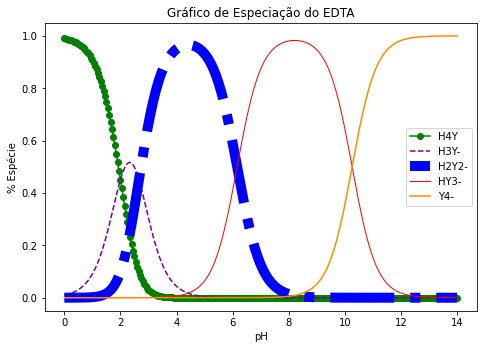

In [250]:
alfa_0 = list(map(alfa0, H, k1, k2, k3, k4))
alfa_1 = list(map(alfa1, H, k1, k2, k3, k4))
alfa_2 = list(map(alfa2, H, k1, k2, k3, k4))
alfa_3 = list(map(alfa3, H, k1, k2, k3, k4))
alfa_4 = list(map(alfa4, H, k1, k2, k3, k4))

figura = plt.figure() #criando o espaço em branco pra plotar
grafico = figura.add_axes([0,0,1,1]) #criando um gráfico vazio no espaço [esquerda, inferior, largura, altura]

#Inserindo as curvas de cada ácido e formatando-as. 
#Elas estão propositalmente desformatadas, aperte shift+tab com o mouse na linha da função e brinque um pouco.
#O que você não colocar vai entrar no default.

grafico.plot(pH, alfa_0, marker = 'o', color = 'green', label = 'H4Y')
grafico.plot(pH, alfa_1, linestyle='--', c = 'purple', label = 'H3Y-')
grafico.plot(pH, alfa_2, ls = '-.', linewidth=10, c = 'b', label = 'H2Y2-')
grafico.plot(pH, alfa_3, lw=1, c = 'red', label = 'HY3-')
grafico.plot(pH, alfa_4, c = '#FF8C00', label = 'Y4-')

#Inserindo legendas para os eixos e o gráfico
grafico.set_ylabel('% Espécie')
grafico.set_xlabel('pH')
grafico.set_title('Gráfico de Especiação do EDTA')

grafico.legend(loc = 0) # Mostrando as 'labels' das curvas. Experimente mudar o valor de loc.

## Problema 4:  


Faça você mesmo todo esse processo que fizemos para o $EDTA$, agora para o $H_3PO_4$.
- Encontre seus pKs (na Wikipedia tem);
- Recrie as funções de alfa para um ácido triprótico; 
    - *é só observar o padrão das equações pro $EDTA$, não precisa deduzir. Se você tiver dificuldade, compare com as equações do $H_2SO_4$, do Notebook de Operadores Matemáticos*.
- Você ainda não precisa ter domínio sobre as operações com listas, então pode simplesmente copiar e colar a sintaxe usada para criar as listas de parâmetros e resultados da função.

## Problema 5:

### Esferas equivalentes

#### Volume e área superficial de uma esfera são dados por:

$$ V = {\pi D^3 \over 6} $$

$$ S = {\pi D^2} $$

$d_p$ é o diâmetro de uma esfera com volume equivalente à partícula. É bem utilizado para partículas com formas geométricas cujo volume pode ser encontrado por geometria analítica.

$$ d_p = \sqrt [3]{6 V \over \pi} $$

$d_s$ é o diámetro de uma esfera de mesma área superficial da partícula. É bem utilizado para partículas com formas geométricas cuja área superfícial pode ser encontrado por geometria analítica. Do contrário, esse valor é determinado apenas experimentalmente.

$$ d_s = \sqrt {S \over \pi} $$

#### Esfericidade:

A esfericidade $ \phi $ nos diz o quanto uma determinada partícula pode ser aproximada por uma esfera. Num espectro que vai de 0 a 1, quanto mais próximo de 1, melhor é a aproximação. 0 e 1 representam um plano ($volume = 0$) e uma esfera. 

$$ \phi = {área\; da\; superfície\; da\; esfera\; de\; mesmo\; volume\; da\; partícula\; \over área\; da\; superfície\; da\; partícula} $$

$$ \phi = {\pi d_p^2 \over S_{partícula}} = {\pi d_p^2 \over S_{esfera \; equivalente}} = {\pi d_p^2 \over \pi d_s^2} $$

$$ \phi = {d_p^2 \over d_s^2} $$

*Note que $d_p \leq d_s \; \forall$ partícula, porque a esfera é o sólido que possui a menor relação $área \over volume$.*

Calcule a esfericidade dos poliedros de Platão de comprimento de aresta L. *(Operações Unitárias I.  Peçanha, 2008)*

| Poliedro   | Volume    | Área superficial|
|:----------:|:---------:|:---------------:|
| Tetraedro  | 0,1179 L³ | 1,7321 L²       |
| Hexaedro   | 1,0000 L³ | 6,0000 L²       |
| Octaedro   | 0,4714 L³ | 3,4641 L²       |
| Dodecaedro | 7,6631 L³ | 20,6458 L²      |
| Icosaedro  | 2,1817 L³ | 8,6603 L²       |

*Dados retirados de Perry's Chemical Engineers' Handbook, 8th Edition (p. 3-7).*

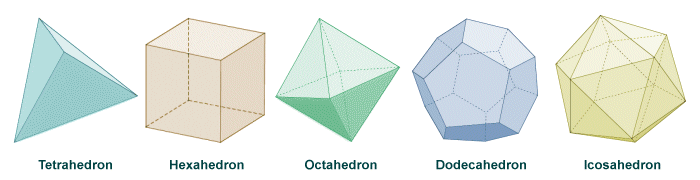

Sugestões:

- Coloque V numa lista e S noutra.
- Implemente uma função que recebe V e calcula dp.
- Implemente uma função que recebe S e calcula ds.
- Implemente uma função que recebe V e S e calcula a esfericidade chamando a função de dp e ds.
- Calcule o resultado usando o combo list(map()) que usa a função esfericidade.

*Tente implementar as funções usando a sintaxe **lambda**.*

*O que você percebe sobre a esfericidade dos poliedros? qual a importância disso?*

In [2]:
import math as m
V = [0.1179, 1.0000, 0.4714, 7.6631, 2.1817]
S = [1.7321, 6.0000, 3.4641, 20.6458, 8.6603]

dp = lambda V: (6*V/m.pi)**(1/3)
ds = lambda S: (S/m.pi)**(1/2)
esfericidade = lambda V, S: dp(V)**2/ds(S)**2
list(map(esfericidade, V, S))

[0.6713057485808569,
 0.8059959770082346,
 0.8455775086617149,
 0.9104485400925976,
 0.9393221042002651]

*Faz sentido que os poliedros formados por mais polígonos sejam melhores aproximações, porque uma esfera pode ser entendida como um poliedro de infinitos polígonos.*

*Um sistema que é dado por formas mais aproximadas de uma esfera são mais fáceis de se fazer o modelo de sistemas particulados do que um sistema totalmente amorfo e variável*